In [ ]:
!pip install roboflow
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.3/873.3 kB 38.4 MB/s eta 0:00:00


In [ ]:
import ultralytics
from ultralytics import YOLO
from IPython import display
from IPython.display import display, Image
import cv2

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9g0FnmyJiIIbrNje8Iyy")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.96, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov8:: 100%|██████████| 14682/14682 [00:02<00:00, 5031.14it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data= 'data.yaml' epochs=10 imgsz=640

Ultralytics YOLOv8.2.96 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

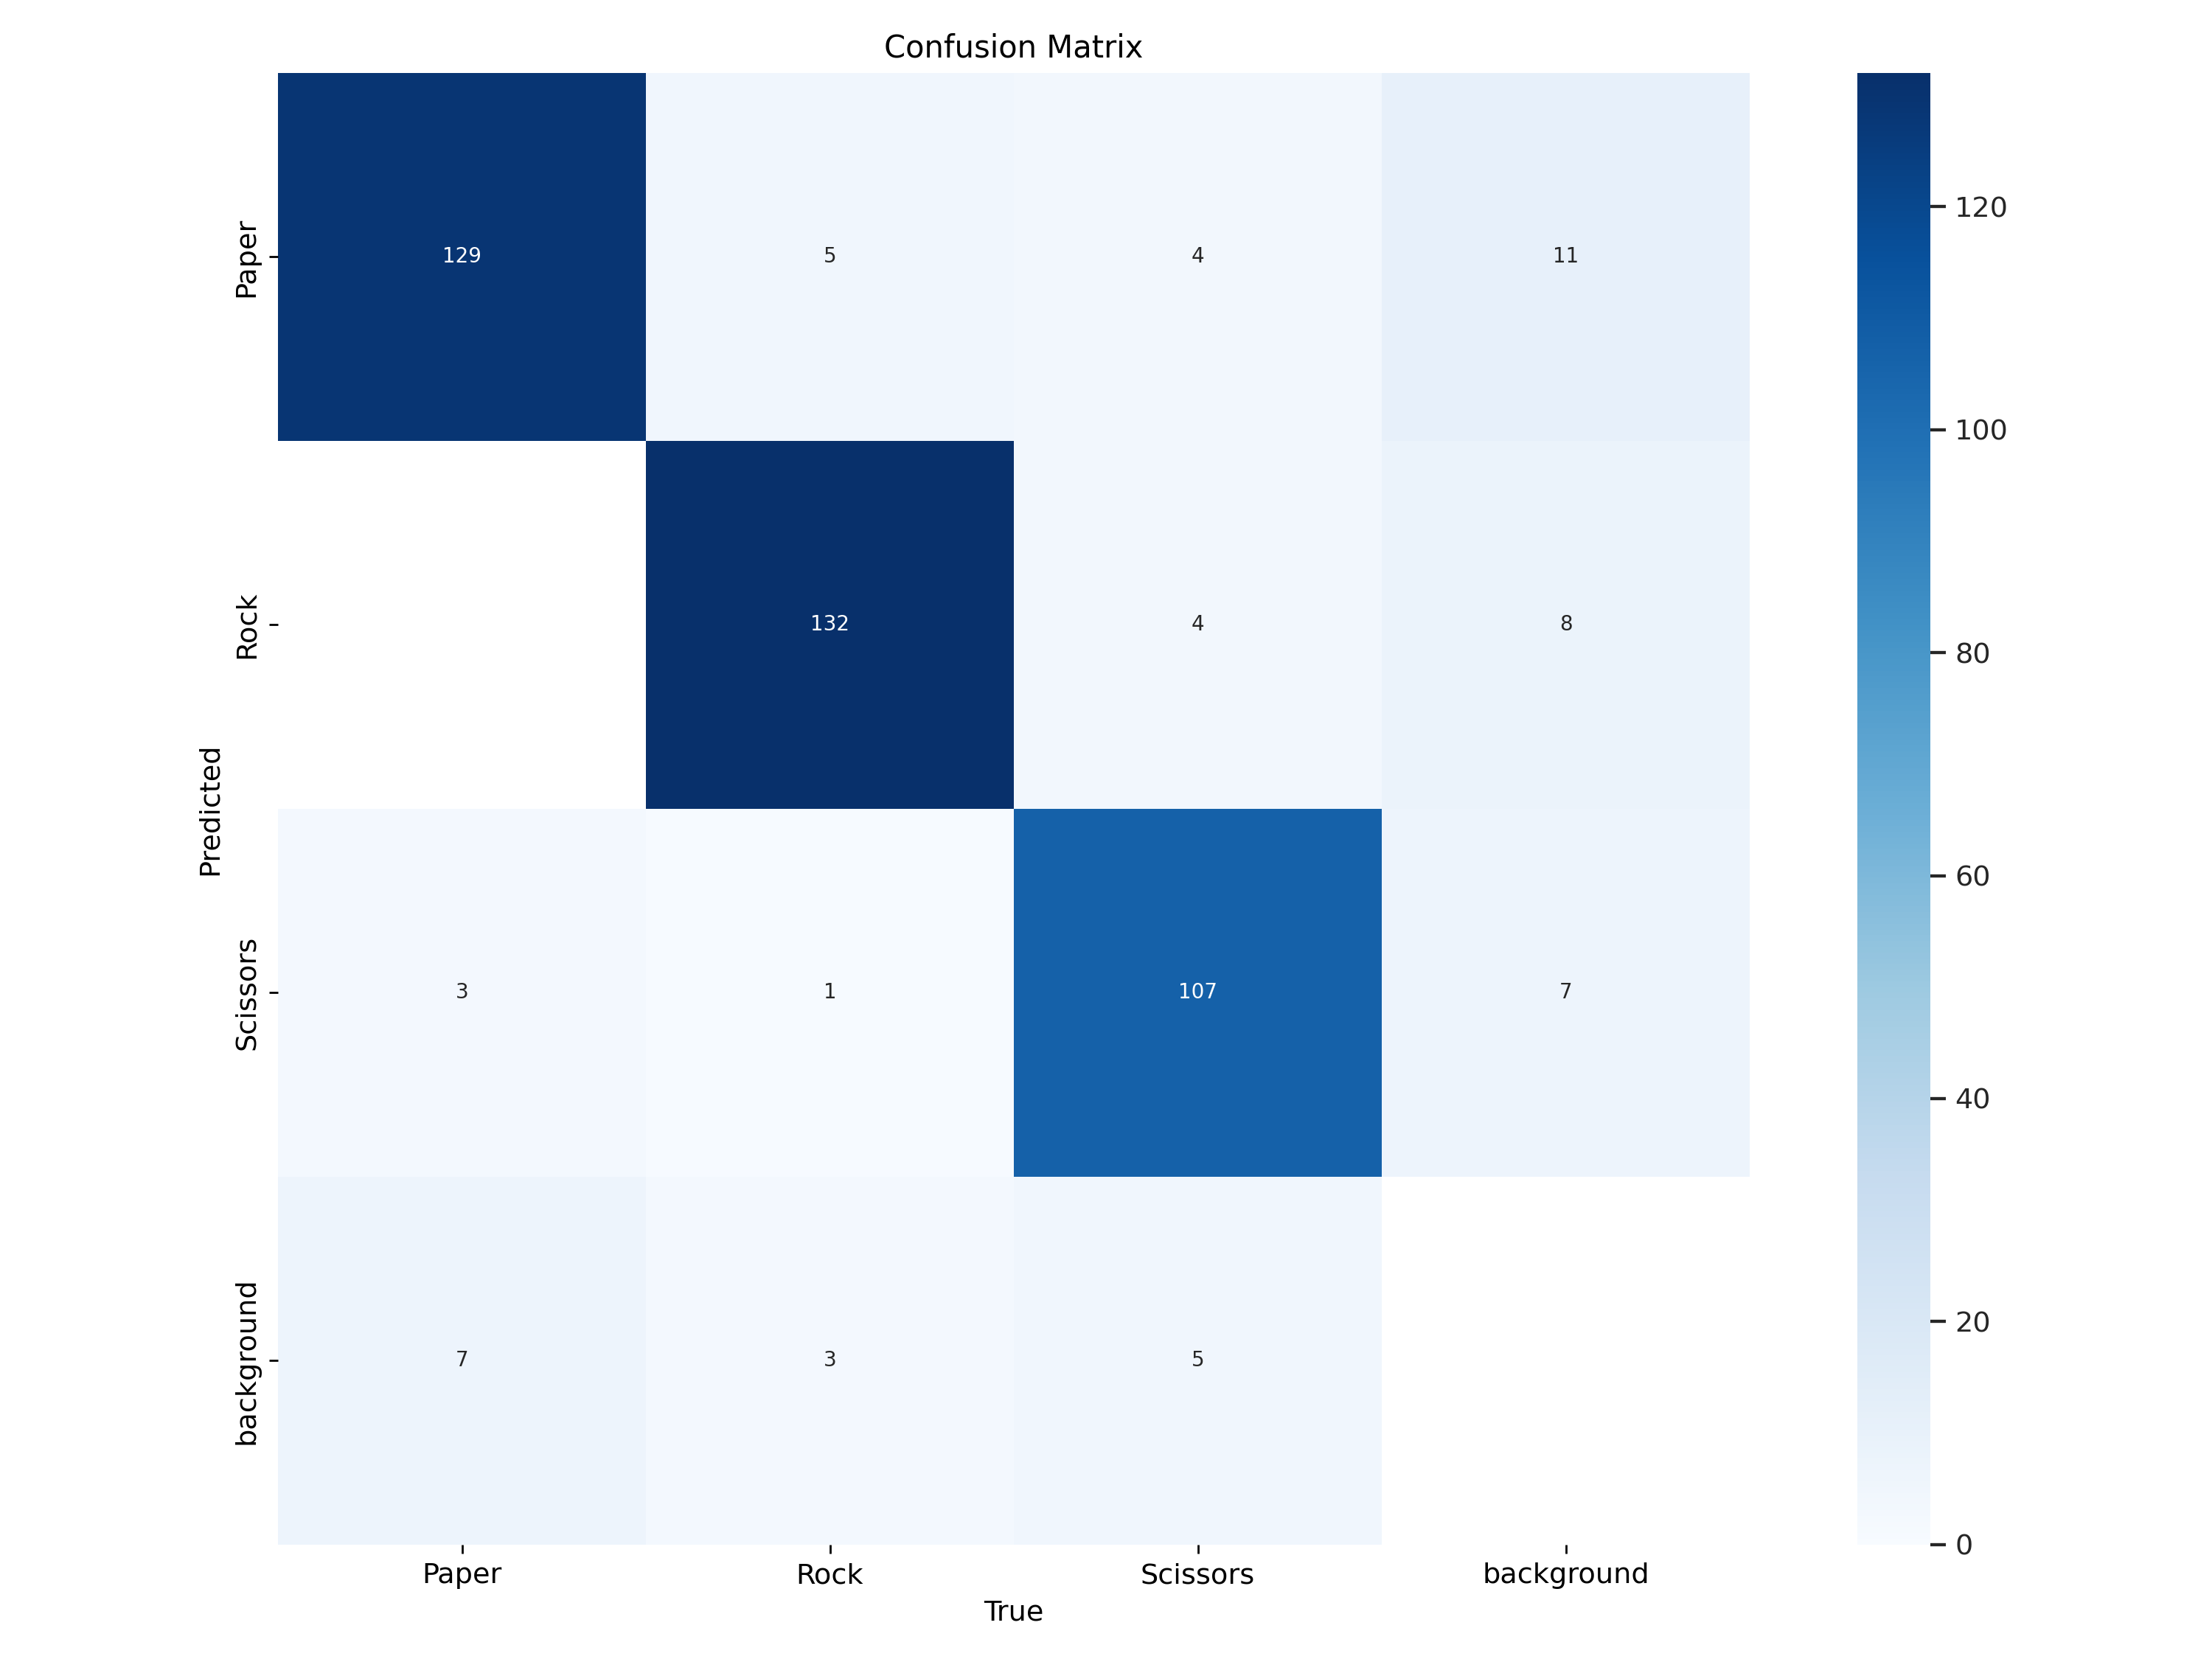

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png',width=600)

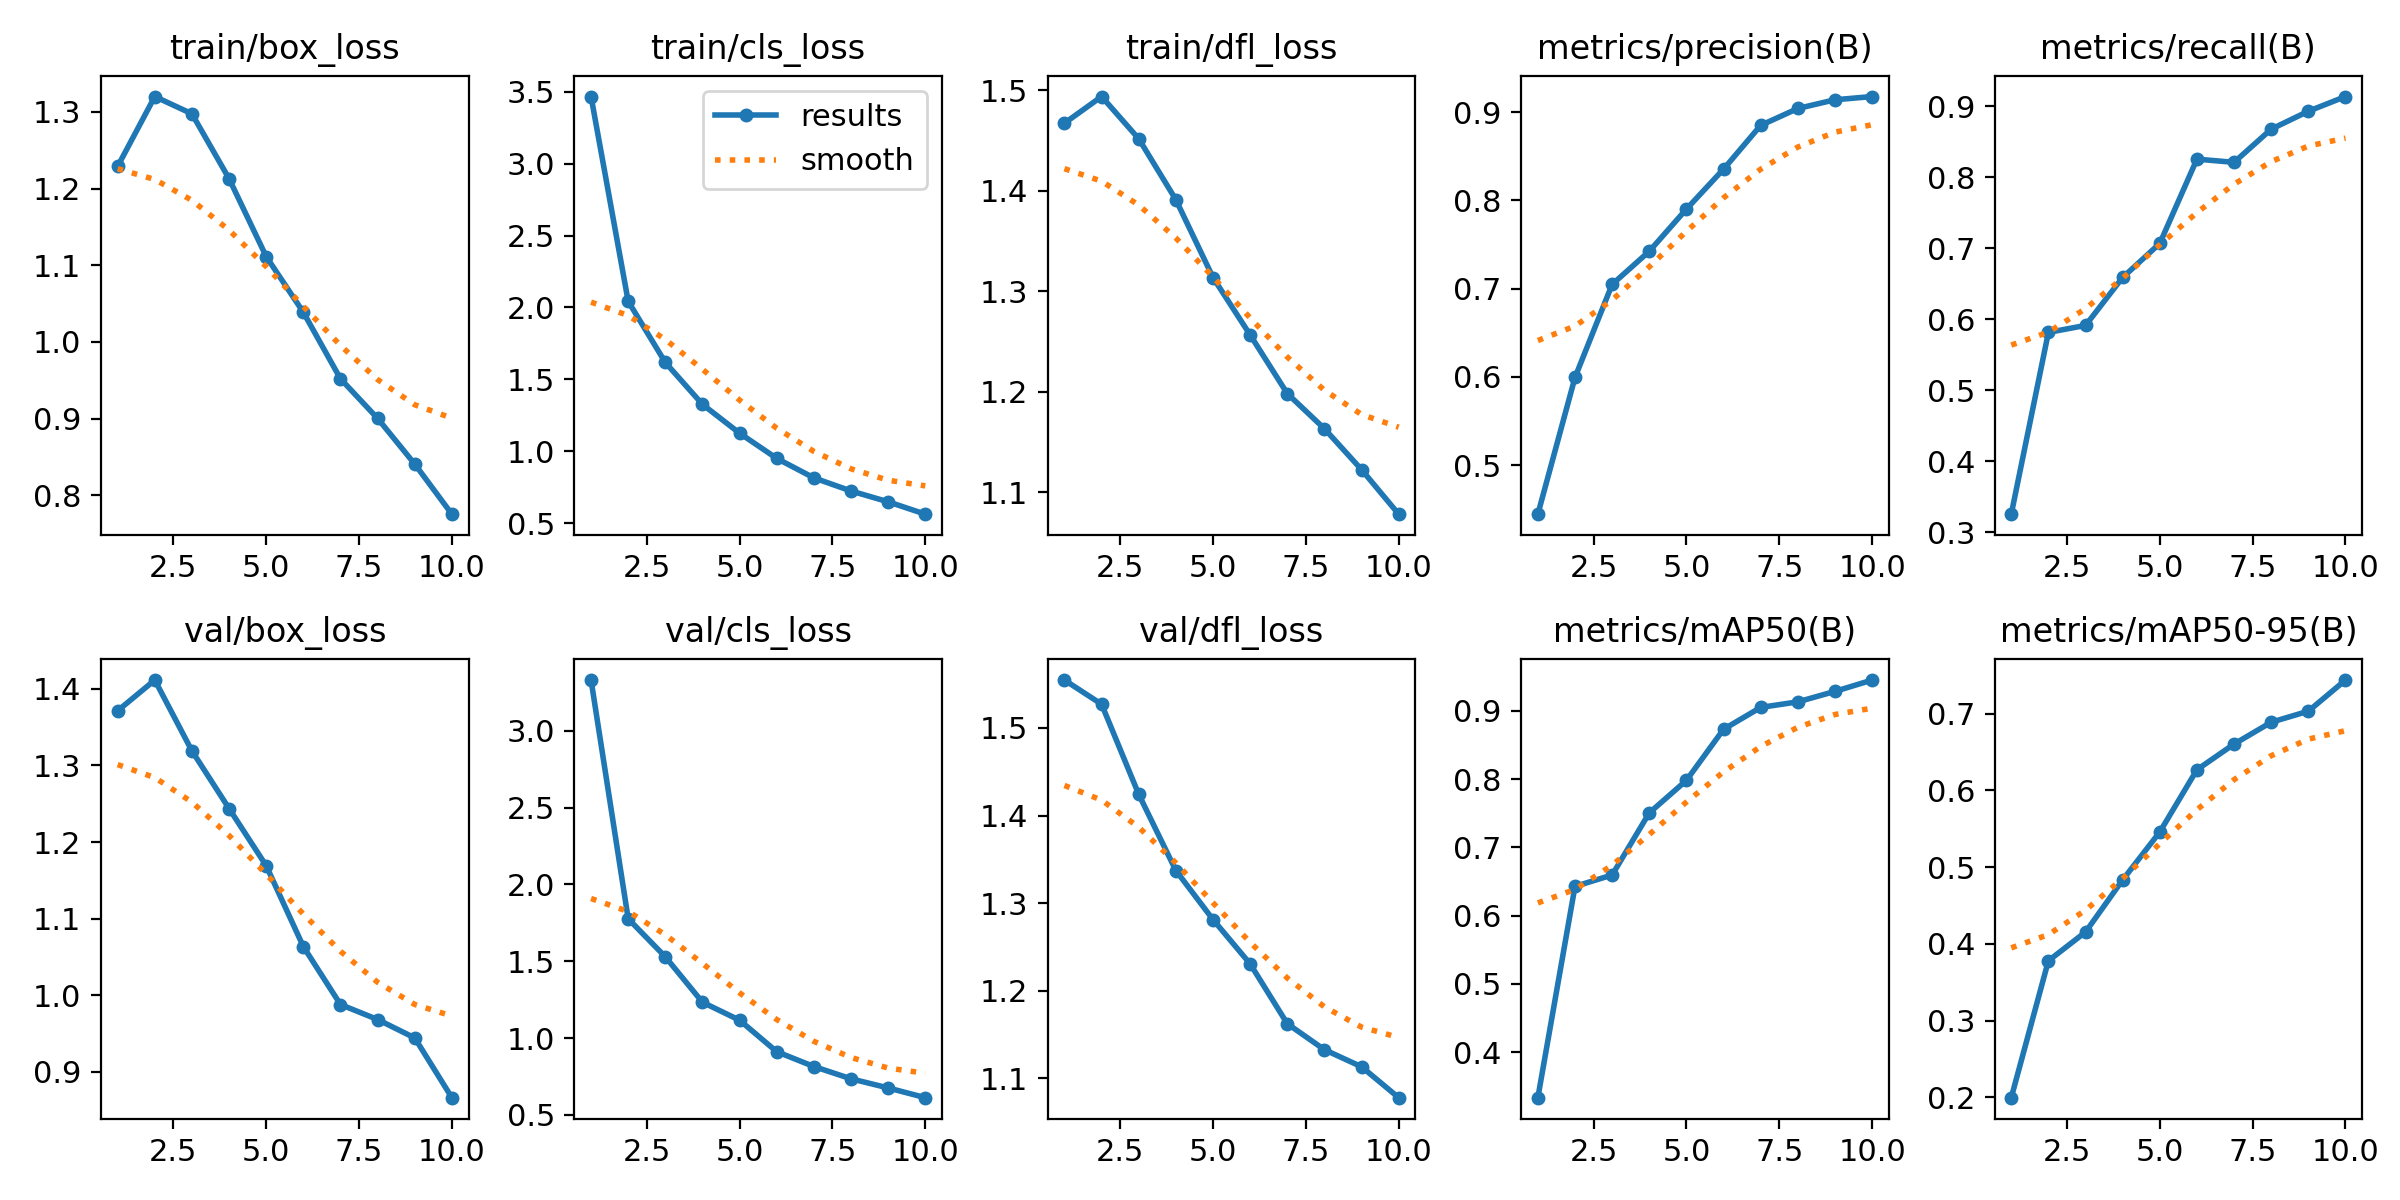

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png',width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/data.yaml

Ultralytics YOLOv8.2.96 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/rock-paper-scissors-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100% 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:08<00:00,  4.33it/s]
                   all        576        400      0.918      0.913      0.945      0.743
                 Paper        132        139       0.89      0.935      0.948      0.739
                  Rock        121        141      0.927      0.905      0.934       0.73
              Scissors        116        120      0.935        0.9      0.952      0.761
Speed: 2.0ms preprocess, 4.4ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5  source=/content/rock-paper-scissors-14/test/images

Ultralytics YOLOv8.2.96 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/304 /content/rock-paper-scissors-14/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 8.1ms
image 2/304 /content/rock-paper-scissors-14/test/images/15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 640x640 (no detections), 7.4ms
image 3/304 /content/rock-paper-scissors-14/test/images/19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 640x640 (no detections), 7.3ms
image 4/304 /content/rock-paper-scissors-14/test/images/20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 640x640 (no detections), 7.3ms
image 5/304 /content/rock-paper-scissors-14/test/images/20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 640x640 1 Scissors, 7.3ms
image 6/304 /content/rock-paper-scissors-14/test/images/20220216_221819_jpg.rf.295ebb583293f91f74e170

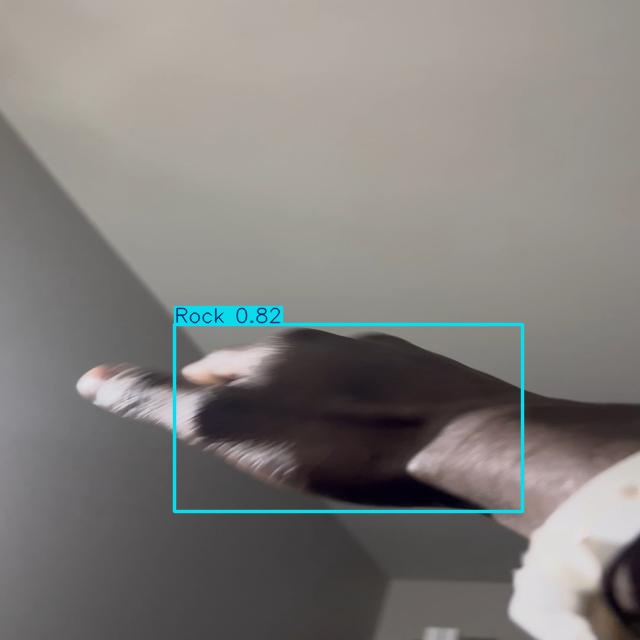

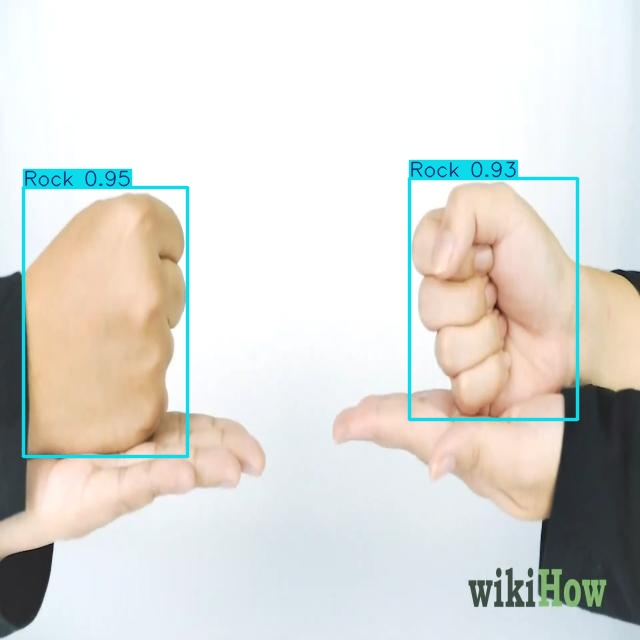

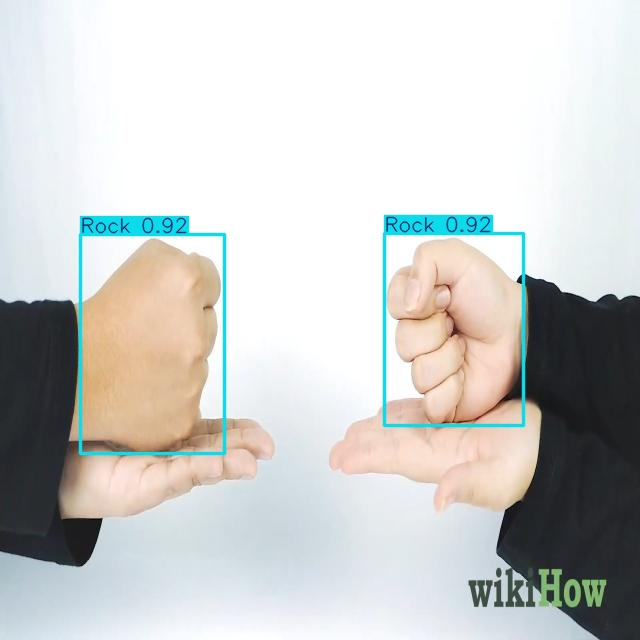

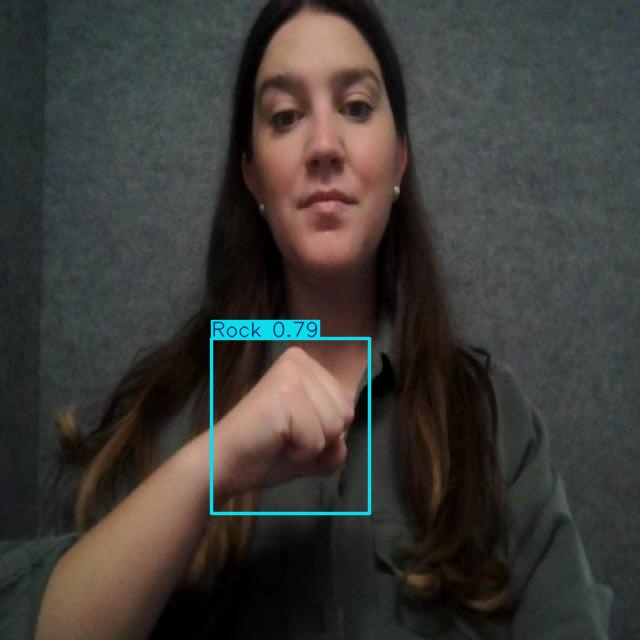

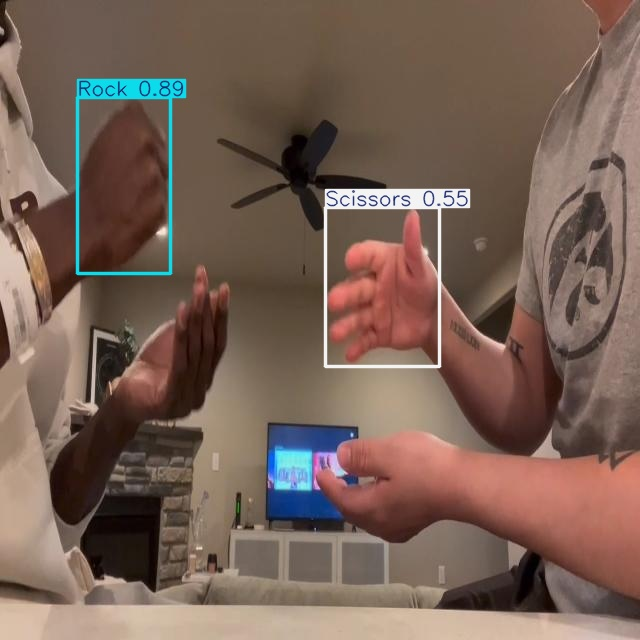

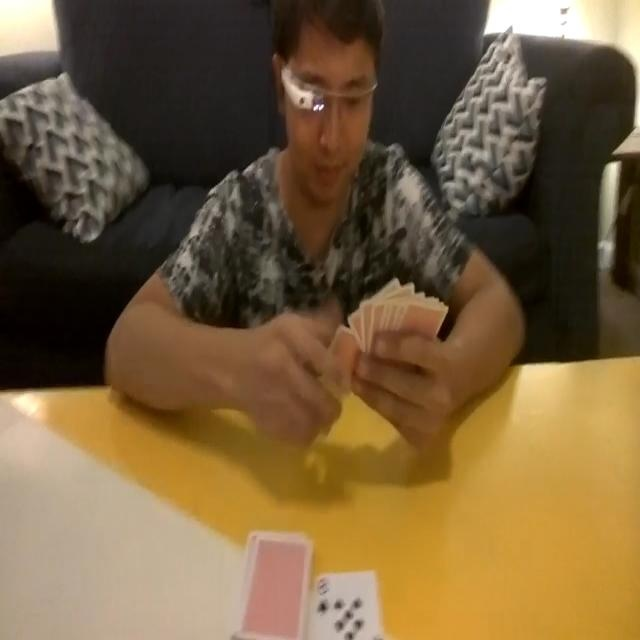

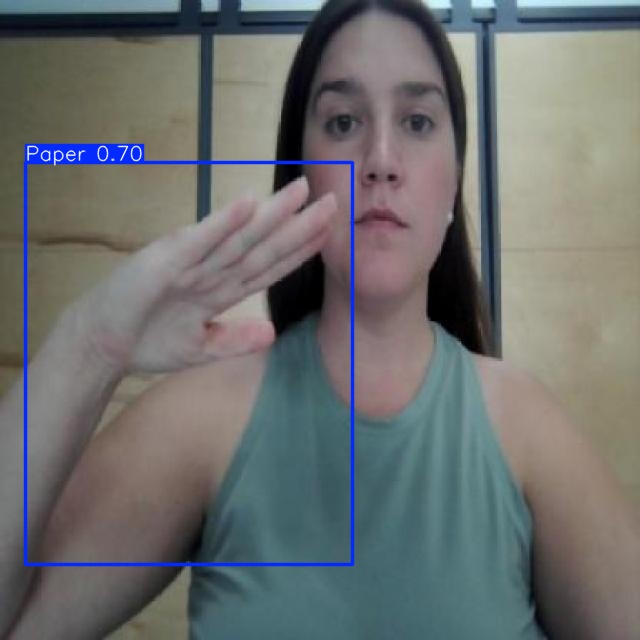

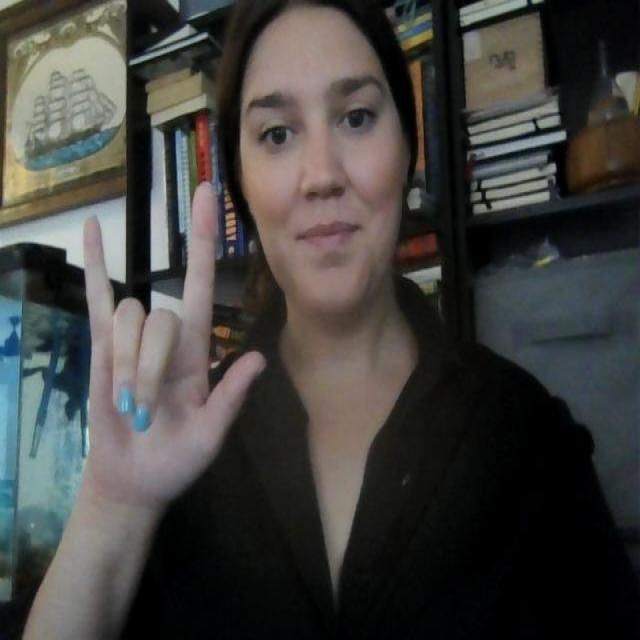

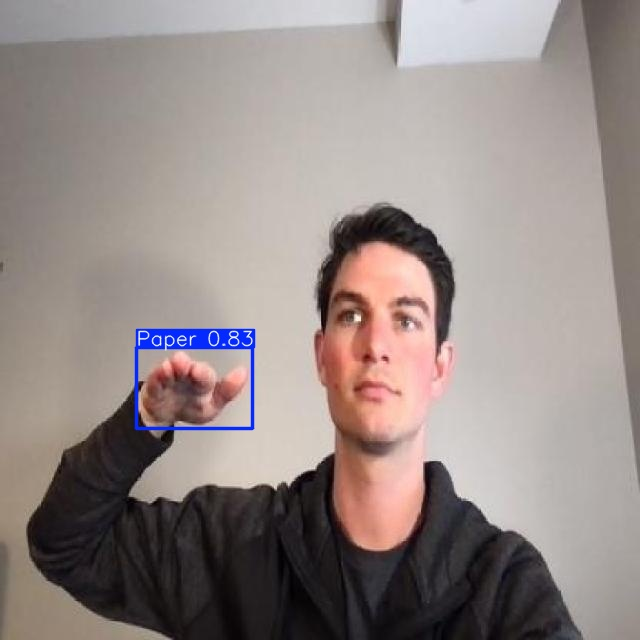

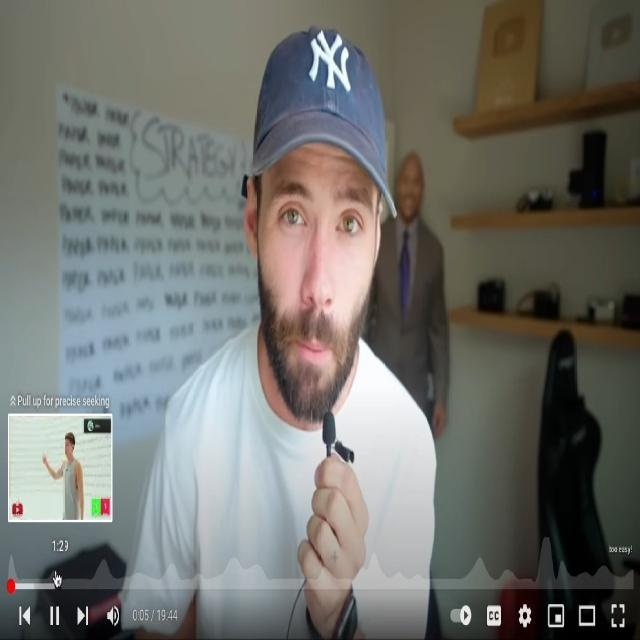

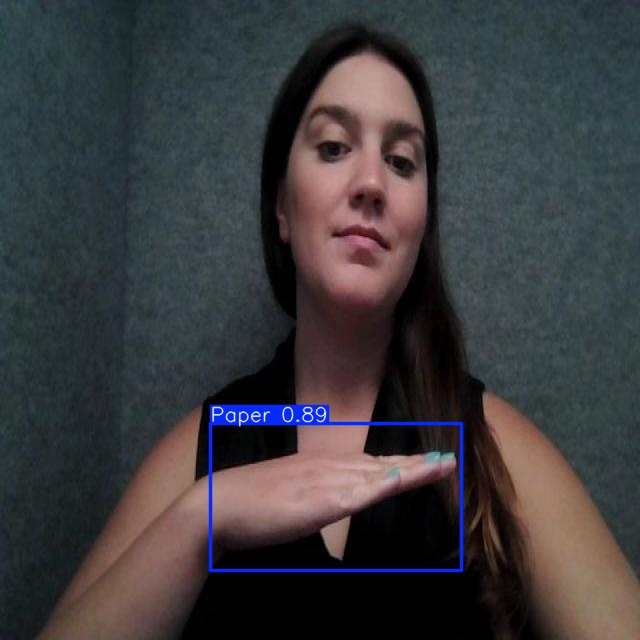

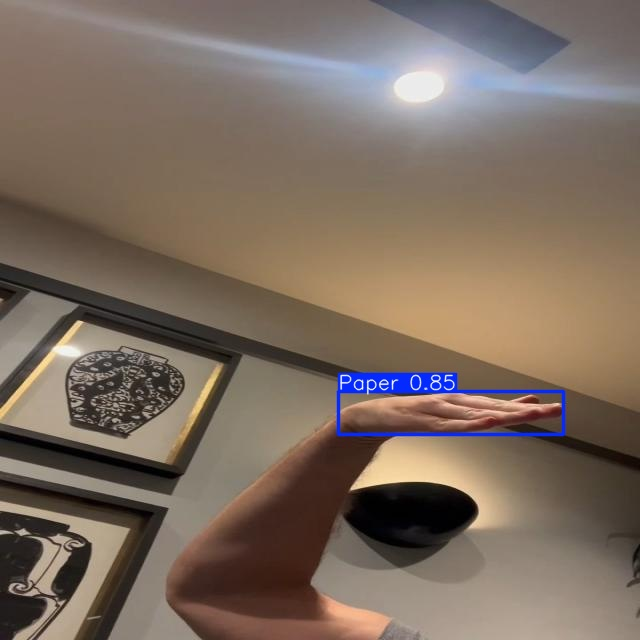

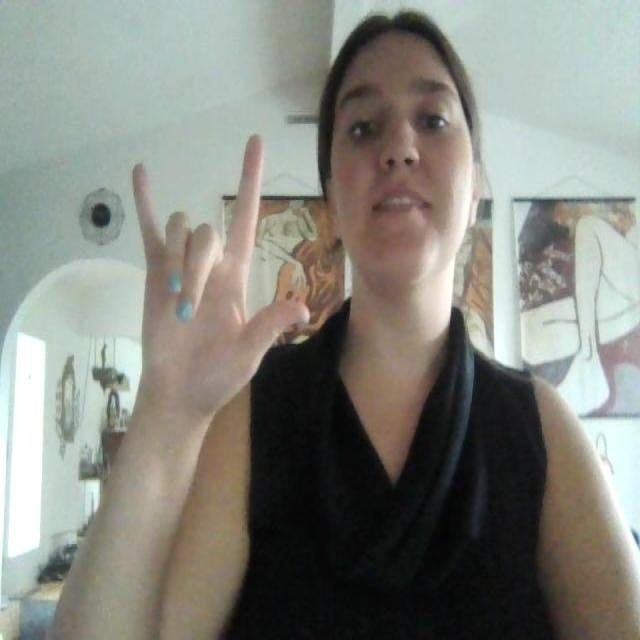

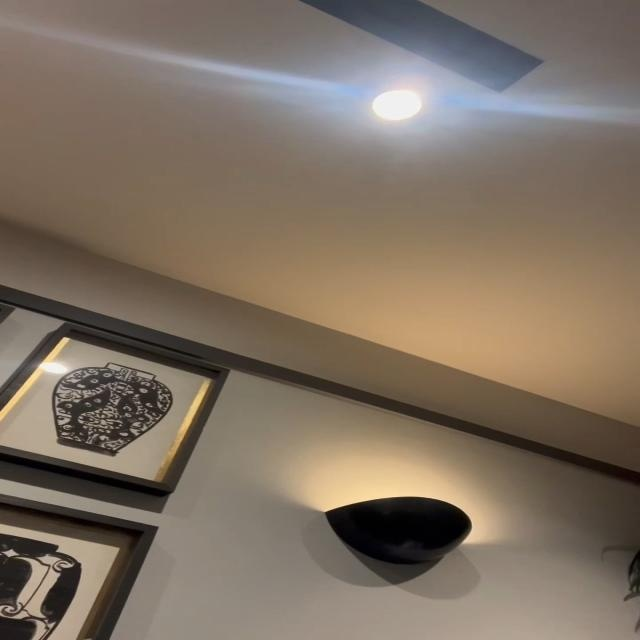

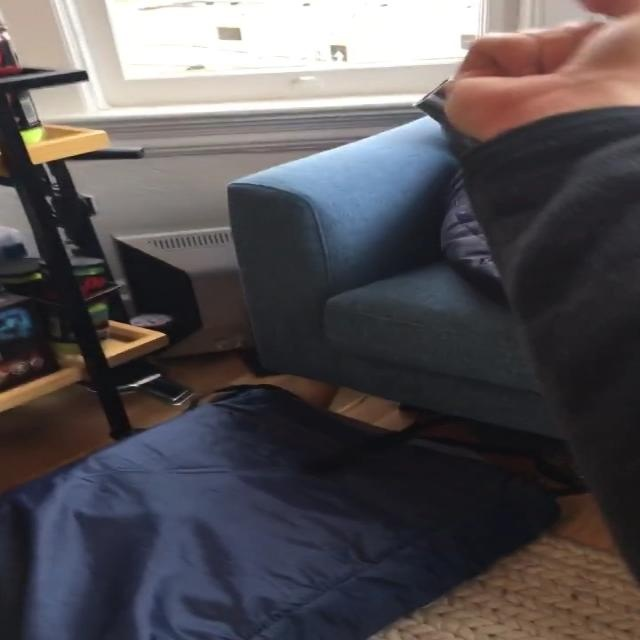

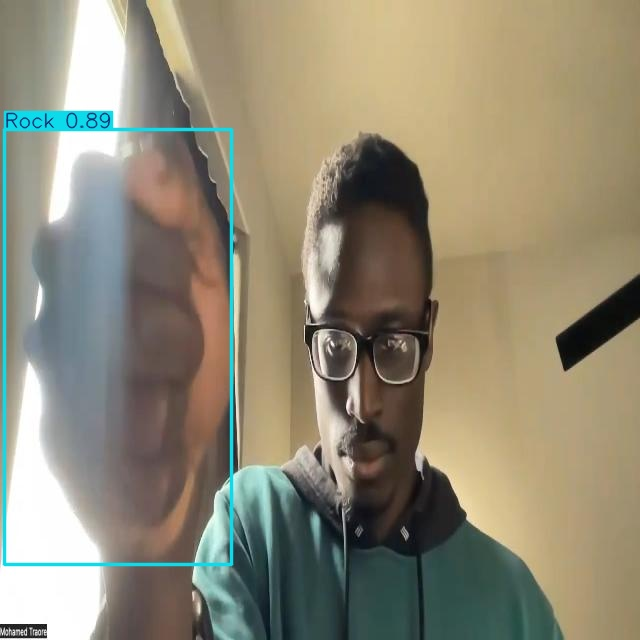

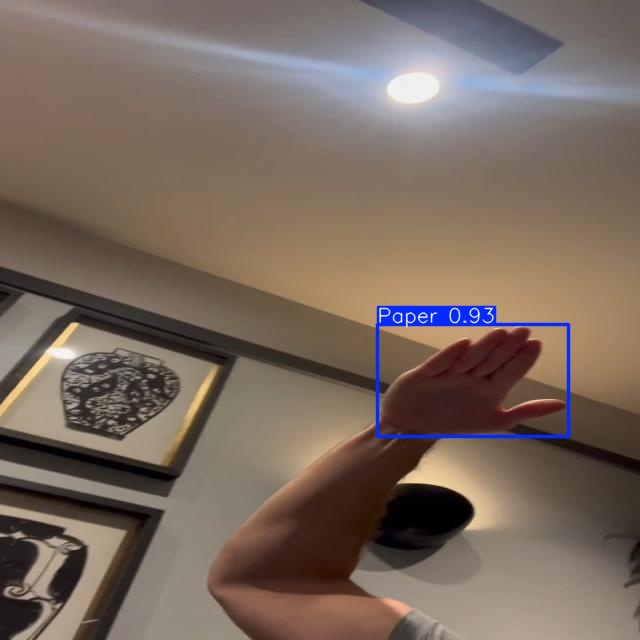

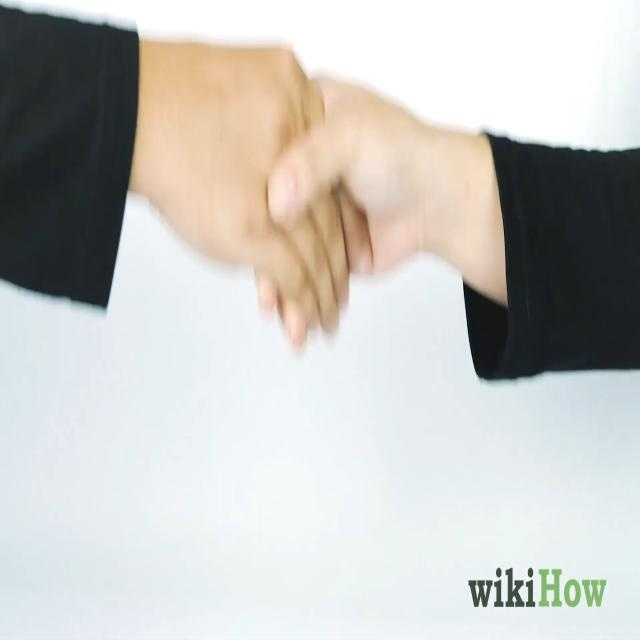

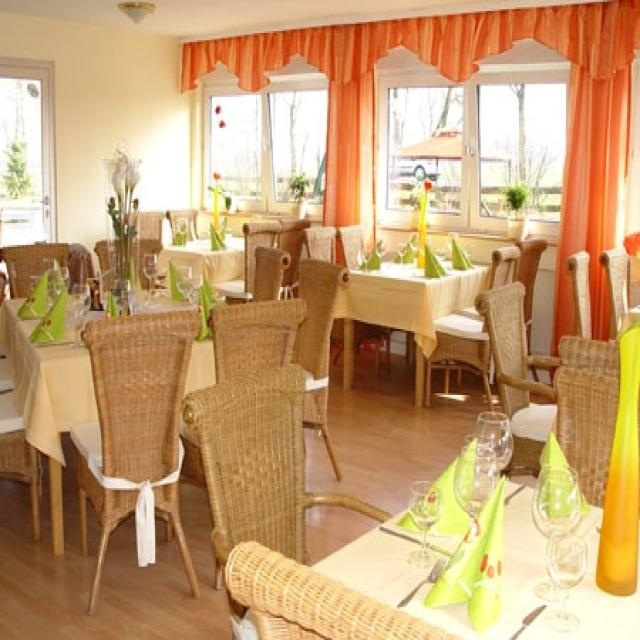

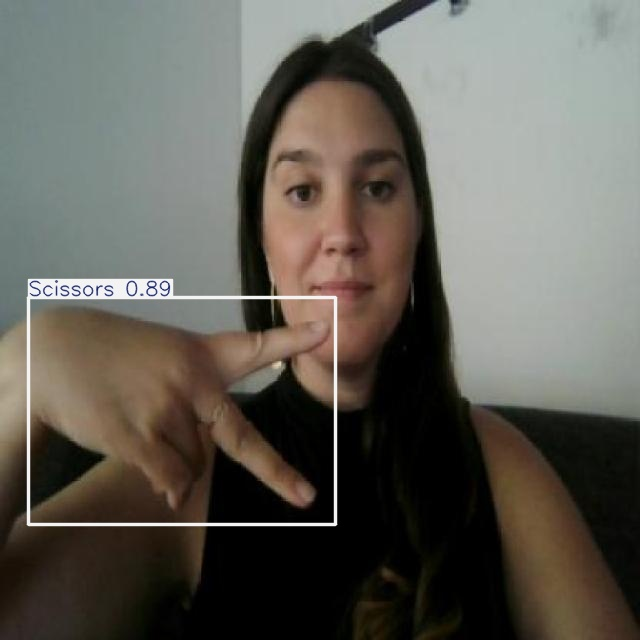

In [ ]:
import glob

for image_path in glob.glob(f'/content/runs/detect/predict//*.jpg')[:20]:
  display(Image(filename=image_path,height=600))
  print('\n')